In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# from ipywidgets import interact#, interactive, fixed, interact_manual
# from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot  # https://github.com/NelisW/pyradi
%matplotlib inline

import network


Define the data set. This is a small set, just used to demonstrate the principle.

In [2]:

def vectorized_result(j):
    """Return a 2-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...1) into a corresponding desired output from the neural
    network."""
    e = np.zeros((2, 1))
    e[j] = 1.0
#     print(e)
    return e


In [33]:
x = np.asarray([[9.,6.],[9.,5.],[7.,9.],[2.,5.],[3.,4.],[10.,7.],[1.,7.],[3.4,6.0],[7.,7.],[0.,10.],
                [6.,5.5],[9.,9.5],[5.,7.],[4.,8.],[2.,3.],[5.,4.5],[1.,.7],
                [0.5,3.],[5.,3.2],[0.5,4.],[3.4,3.2],[2.3,1.2],[7.,5.5],
                [6.,4.],[4.,1.],[2.,0.5],[0.,5.],[9.,3.],[7.,3.],[7.,3.]]).astype(np.float32)
y = np.asarray([*16*[1],*14*[0]]).reshape(-1,)
xin = [np.reshape(xi,(-1,1)) for xi in x]
yin = [vectorized_result(yi) for yi in y]
training_data = zip(xin,yin)
test_data = zip(xin.copy(),y.copy())

# the list defines the number of nodes in layers 0, 1, 2.
numhid = 4
net = network.Network(sizes=[2, numhid, 2],nlfn=network.tansig,nlfnpr=network.tansig_prime,silent=False,seed=10)

net.SGD(training_data, epochs=2500, mini_batch_size=30, eta=5,test_data=test_data)


Epoch 0: 14 / 30
Epoch 200: 26 / 30
Epoch 400: 27 / 30
Epoch 600: 28 / 30
Epoch 800: 28 / 30
Epoch 1000: 28 / 30
Epoch 1200: 29 / 30
Epoch 1400: 29 / 30
Epoch 1600: 30 / 30
Epoch 1800: 30 / 30
Epoch 2000: 30 / 30
Epoch 2200: 30 / 30
Epoch 2400: 30 / 30


In [58]:
print(net.biases)
print(net.biases[1])
print(net.weights)
print(net.weights[0][0][0])


[array([[ -8.09561658],
       [  8.56489719],
       [-13.58474682],
       [  8.10259224]]), array([[ 1.17410398],
       [-1.26027612]])]
[[ 1.17410398]
 [-1.26027612]]
[array([[-0.80426567,  3.55678147],
       [ 6.72114557, -9.5686872 ],
       [ 2.91791032, -1.75784353],
       [-4.27146871, -0.99226992]]), array([[-5.65503639,  7.11060094, -5.66288056,  8.15422898],
       [ 5.72124672, -7.07580978,  5.67112737, -8.12363539]])]
-0.8042656701039161


`net.biases[0]` are the bias values for the hidden neurons.  
`net.biases[0][n]` is the bias value for the hidden neuron n.  
`net.biases[1]` is the bias value for the output neuron.  

`net.weights[0]` are the weight values for the hidden neurons.  
`net.weights[0][n]` are the weight values for the hidden neuron n.  
`net.weights[0][n][0]` is the weight value between input x1 and the hidden neuron n.  
`net.weights[0][n][1]` is the weight value between input x2 and the hidden neuron n.  

$0 = w_1x_1+w_2x_2+b$  
$x_2 = (-w_1x_1 -b)/w_2 $  


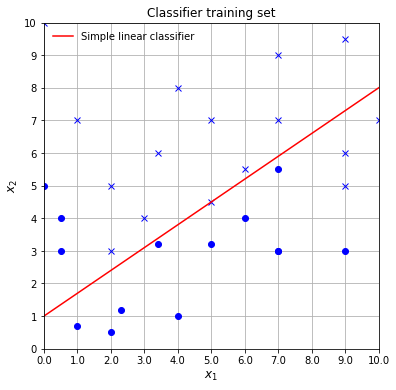

In [30]:
# plot the training set and a simple linear classifier
p = ryplot.Plotter(1,1,1,figsize=(6,6),doWarning=False)
for (x1,x2),yo in zip(x,y):
    marker = 'o' if yo==0 else 'x'
    p.plot(1,x1,x2,'Classifier training set','$x_1$','$x_2$',linestyle='',markers=[marker],plotCol=['b'],pltaxis=[0,10,0,10])
x1 = np.linspace(0,10,100)
p.plot(1,x1,x1*7/10+1,label=['Simple linear classifier'],plotCol=['r'])
p.saveFig('../pic/chC-trainingset.pdf')               

In [35]:
xp = np.linspace(0,10,100)
yp = np.linspace(0,10,100)
varx, vary = np.meshgrid(xp, yp)

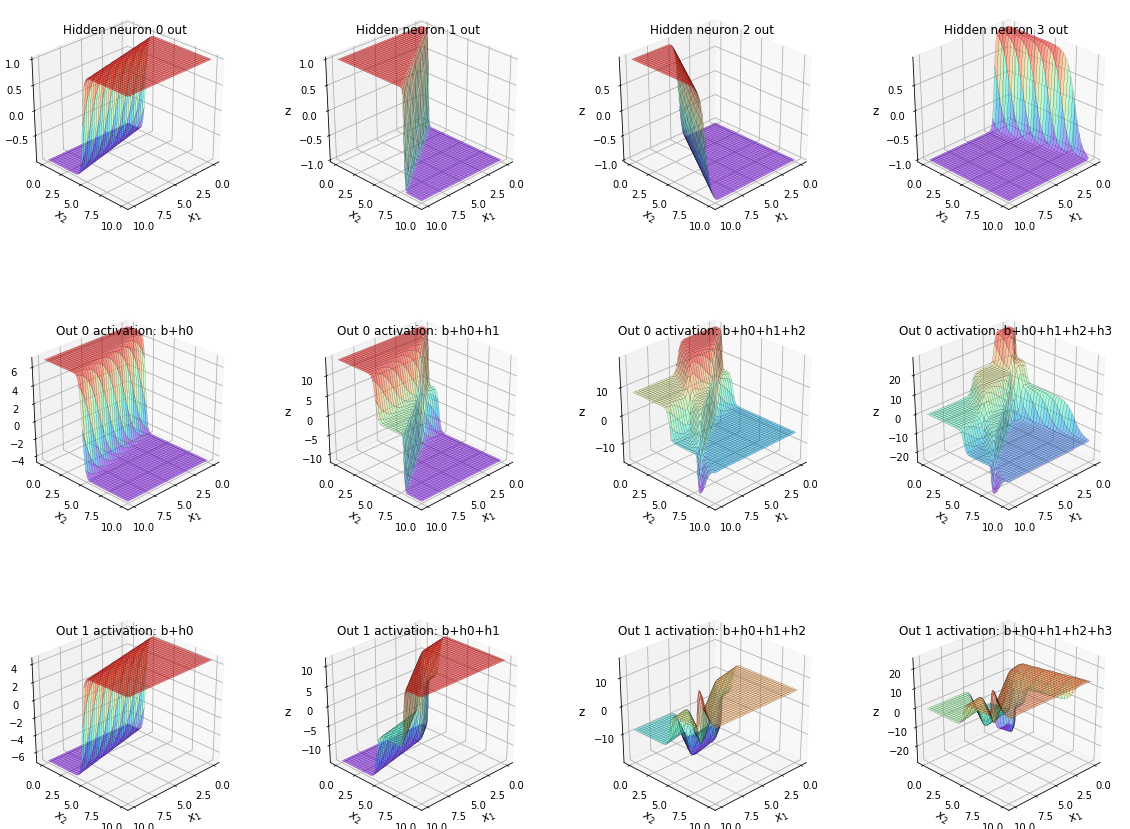

In [105]:
p = ryplot.Plotter(1,3,numhid,figsize=(5*numhid,5*3),doWarning=False)
hidden = []
asum0 = net.biases[1][0] * np.ones(varx.shape)
asum1 = net.biases[1][1] * np.ones(varx.shape)
isum = 'b+'
for i in range(numhid):
    isum += f'h{i}'
    hidden.append(network.tansig(varx * net.weights[0][i][0] + vary * net.weights[0][i][1] + net.biases[0][i]))
    asum0 += hidden[i] * net.weights[1][0][i]
    asum1 += hidden[i] * net.weights[1][1][i]

    p.mesh3D(i+1, varx, vary, hidden[i], ptitle=f'Hidden neuron {i} out', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.1, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    
    p.mesh3D(i+5, varx, vary, asum0, ptitle=f'Out 0 activation: {isum}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.1, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    p.mesh3D(i+9, varx, vary, asum1, ptitle=f'Out 1 activation: {isum}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.1, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    isum += '+'
p.saveFig('../pic/chC-hiddeneurons.pdf')


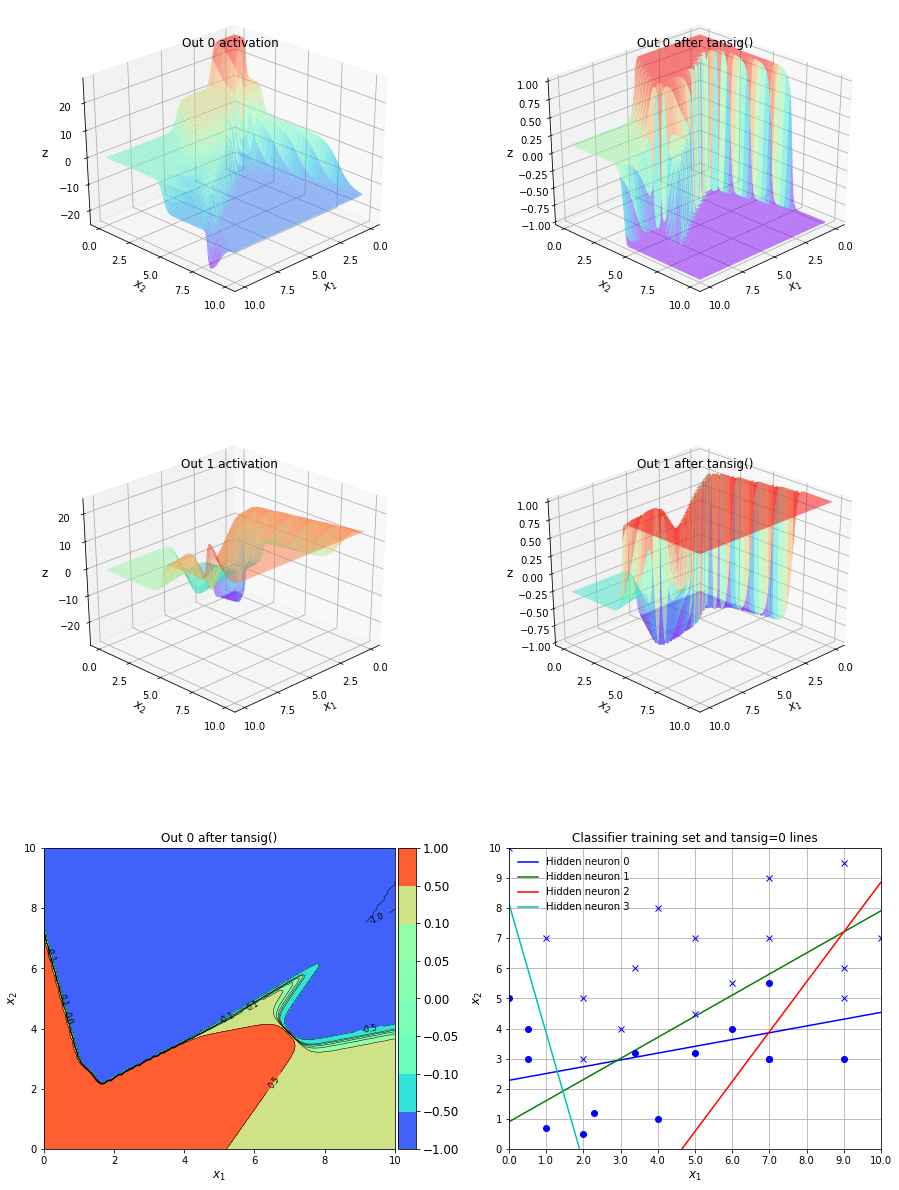

In [106]:

p = ryplot.Plotter(1,3,2,figsize=(15,21),doWarning=False)
p.mesh3D(1, varx, vary, asum0, ptitle=f'Out 0 activation', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
p.mesh3D(2, varx, vary, network.tansig(asum0), ptitle=f'Out 0 after tansig()', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

p.mesh3D(3, varx, vary, asum1, ptitle=f'Out 1 activation', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
p.mesh3D(4, varx, vary, network.tansig(asum1), ptitle=f'Out 1 after tansig()', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

p.meshContour(5, xp,yp, network.tansig(asum0), levels=[-1, -0.5,-0.1,-0.05,0, 0.05,0.1,0.5,1],
              ptitle='Out 0 after tansig()', xlabel='$x_1$', ylabel='$x_2$',
                plotCol=['k'], titlefsize=12, meshCmap=cm.rainbow, cbarshow=True,
                cbarorientation='vertical', cbarfontsize=12, drawGrid=False, yInvert=False, 
                negativeSolid=True, contourFill=True, contourLine=True, logScale=False,
                contLabel=True, contFmt='%.1f', contCol='k', contFonSz=8);

xn1 = np.linspace(0,10,100)
for i in range(numhid):
    xn2 = (-xn1*net.weights[0][i][0] - net.biases[0][i]) / net.weights[0][i][1]
    p.plot(6,xn1,xn2,label=[f'Hidden neuron {i}'])

for (x1,x2),yo in zip(x,y):
    marker = 'o' if yo==0 else 'x'
    p.plot(6,x1,x2,'Classifier training set and tansig=0 lines','$x_1$','$x_2$',linestyle='',markers=[marker],plotCol=['b'],pltaxis=[0,10,0,10])
p.saveFig('../pic/chC-classif0.pdf')


## tansig 

In [ ]:
x = np.linspace(-3,3,200)
p = ryplot.Plotter(1,1,1,figsize=(12,5))
p.plot(1,x,tansig(x),'tansig function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);

In [ ]:
p = ryplot.Plotter(1,1,1,figsize=(12,5))
p.plot(1,x,tansig_prime(x),'d(tansig) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);
p.plot(1,x,np.gradient(tansig(x),x),'d(tansig) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,0,1]);
